In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
print(tf.__version__)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/IRezig/DAT_902.git 

In [ ]:
data = pd.read_csv('/content/DAT_902/Multi_Label_dataset/train.csv')
data.shape

In [ ]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/DAT_902/Multi_Label_dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)


100%|██████████| 7254/7254 [00:27<00:00, 265.33it/s]


In [ ]:
X.shape

(7254, 350, 350, 3)

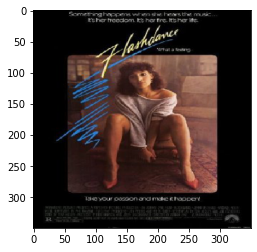

In [ ]:
plt.imshow(X[1])

In [ ]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [ ]:
y = data.drop(['Id', 'Genre'], axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15 )

In [ ]:
X_train[0].shape

(350, 350, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_90 (Batc (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_91 (Batc (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 86, 86, 32)      

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 177s 29ms/sample - loss: 0.6875 - accuracy: 0.6478 - val_loss: 0.3737 - val_accuracy: 0.9011
Epoch 2/5
6165/6165 [==============================] - 176s 29ms/sample - loss: 0.3077 - accuracy: 0.8912 - val_loss: 0.2549 - val_accuracy: 0.9078
Epoch 3/5
6165/6165 [==============================] - 173s 28ms/sample - loss: 0.2606 - accuracy: 0.9070 - val_loss: 0.2433 - val_accuracy: 0.9071
Epoch 4/5
6165/6165 [==============================] - 174s 28ms/sample - loss: 0.2502 - accuracy: 0.9102 - val_loss: 0.2360 - val_accuracy: 0.9112
Epoch 5/5
6165/6165 [==============================] - 174s 28ms/sample - loss: 0.2442 - accuracy: 0.9119 - val_loss: 0.2379 - val_accuracy: 0.9080


In [ ]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'Val'], loc='upper left')
  plt.show()

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model loss")
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'Val'], loc='upper left')
  plt.show()

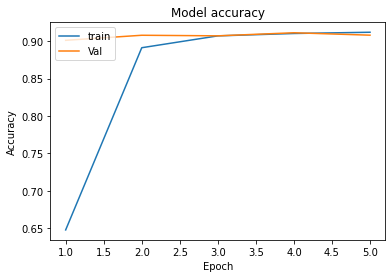

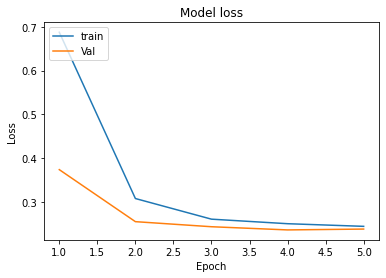

In [ ]:
plot_learningCurve(history, 5)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Action
Comedy


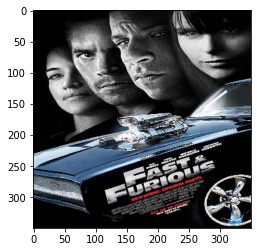

In [ ]:
img = image.load_img('fastandferious.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)

top3 = np.argsort(y_prob[0])[:-4: -1]
top3

for i in range(3):
  print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Romance


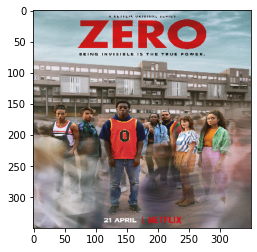

In [ ]:
img = image.load_img('Zero.jpeg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)

top3 = np.argsort(y_prob[0])[:-4: -1]
top3

for i in range(3):
  print(classes[top3[i]])